## Задачи классификации и кластеризации: Дискриминантный и факторный анализ

### Домашнее задание
1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length (длина чашелистика) и sepal_width (ширина чашелистика) и целевую переменную
variety (разнообразие)
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
(разделяющую плоскость можно не строить, но обратите внимание, что
класса 3).
6. Отбросьте целевую переменную и оставьте только два признака -
sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и
визуализируйте полученную кластеризацию

In [5]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [6]:
iris = load_iris()

In [7]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

In [9]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
data.rename(columns={'sepal length (cm)': 'длина чашелистика (см)', 'sepal width (cm)': 'ширина чашелистика (см)', 'petal length (cm)':'длина лепестка (см)', 'petal width (cm)':'ширина лепестка (см)'
                     },
                     inplace=True)

data

,длина чашелистика (см),ширина чашелистика (см),длина лепестка (см),ширина лепестка (см)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
data.rename(columns={'sepal length (cm)': 'длина чашелистика (см)', 'sepal width (cm)': 'ширина чашелистика (см)'
                     },
                     inplace=True)

data

,длина чашелистика (см),ширина чашелистика (см),длина лепестка (см),ширина лепестка (см)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
# Оставляем для анализа два признака - sepal_length (длина чашелистика) и sepal_width (ширина чашелистика) 

iris1 = data[['длина чашелистика (см)', 'ширина чашелистика (см)']] 
iris1.head()

,длина чашелистика (см),ширина чашелистика (см)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [13]:
iris1_class = data_class
iris1_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [15]:
len(y_test)                         # проверяем, сколько у нас осталось позиций для теста

38

In [16]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [17]:
lda = LinearDiscriminantAnalysis()

In [18]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [19]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       2, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 1])

In [20]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [21]:
result

,0,1
0,1,1
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


In [22]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_test, lda.predict(X_test)) # коэффициент точности модели

1.0

Коэффициент точности модели равен 0.97368, что говорит о том, что модель определяет данны с точностью 97,37%

In [24]:
# коэффициенты дискриминатных линий
lda.coef_

array([[  5.62854127,  14.09982566, -16.84819738, -22.77866755],
       [ -1.08625087,  -3.90233111,   3.51566367,   2.40064567],
       [ -3.52352022,  -7.73184548,  10.30232425,  16.10906082]])

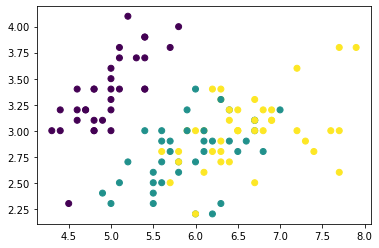

In [25]:
# визуализируем дискриминантную линию по 2 признакам (длина и ширина чашелистика)
plt.scatter(X_train['длина чашелистика (см)'], X_train['ширина чашелистика (см)'], c=y_train)
plt.show()

In [26]:
small_train = X_train[(y_train == 0) | (y_train == 1) | (y_train == 2)]
small_train = small_train[['длина чашелистика (см)', 'ширина чашелистика (см)']]
sy_train = y_train[(y_train == 0) | (y_train == 1) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 1) | (y_test == 2)]
small_test = small_test[['длина чашелистика (см)', 'ширина чашелистика (см)']]
sy_test = y_test[(y_test == 0) | (y_test == 1) | (y_test == 2)]

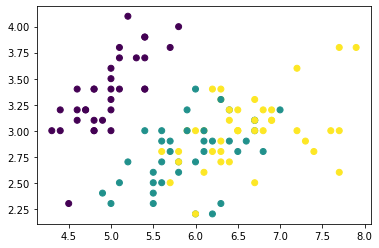

In [27]:
plt.scatter(small_train['длина чашелистика (см)'], small_train['ширина чашелистика (см)'], c=sy_train)
plt.show()

In [28]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [29]:
# посмотрим на центроиды
lda_small.means_

array([[4.96969697, 3.37575758],
       [5.94473684, 2.78157895],
       [6.60731707, 3.00243902]])

In [30]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

<ipython-input-31-9a30949d41bf>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',


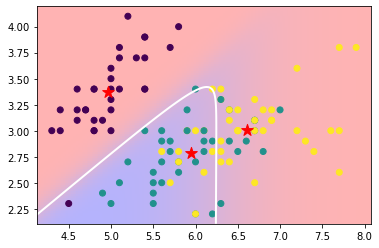

In [31]:
# сам scatter plot
plt.scatter(small_train['длина чашелистика (см)'], small_train['ширина чашелистика (см)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [32]:
lda_small.coef_

array([[-6.09782794,  7.69745047],
       [ 1.24451381, -3.20750311],
       [ 3.75455603, -3.22270116]])

In [33]:
# какая будет точность?
accuracy_score(sy_test, lda_small.predict(small_test))

0.868421052631579

In [34]:
data[['длина чашелистика (см)', 'ширина чашелистика (см)']].corr()

,длина чашелистика (см),ширина чашелистика (см)
длина чашелистика (см),1.00000,-0.11757
ширина чашелистика (см),-0.11757,1.00000


коэффициент показывает низкю корреляцию между признаками, что хорошо для модели

In [35]:
# Анализ на основе логистической регрессии

from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression()

In [37]:
lr.fit(small_train, sy_train)

LogisticRegression()

In [38]:
lr.predict_proba(small_test)

array([[7.06730109e-03, 3.26803884e-01, 6.66128815e-01],
       [2.68611556e-03, 2.19423291e-01, 7.77890593e-01],
       [8.18917519e-01, 1.43003988e-01, 3.80784925e-02],
       [3.78206903e-05, 9.76995592e-02, 9.02262620e-01],
       [9.33426304e-01, 2.34812049e-02, 4.30924913e-02],
       [1.06634464e-02, 2.39628333e-01, 7.49708220e-01],
       [9.58843812e-01, 3.27284514e-02, 8.42773610e-03],
       [6.06132456e-02, 7.72280649e-01, 1.67106105e-01],
       [5.71475408e-02, 6.49387154e-01, 2.93465305e-01],
       [2.38559075e-01, 5.29872877e-01, 2.31568048e-01],
       [8.76596139e-04, 1.84953307e-01, 8.14170097e-01],
       [9.23431810e-01, 6.00953885e-02, 1.64728014e-02],
       [5.71475408e-02, 6.49387154e-01, 2.93465305e-01],
       [8.97262509e-01, 8.21805001e-02, 2.05569904e-02],
       [9.45496358e-01, 2.56705111e-02, 2.88331307e-02],
       [1.05371371e-01, 6.28015045e-01, 2.66613585e-01],
       [7.66460827e-01, 2.03303663e-01, 3.02355101e-02],
       [8.83637444e-03, 4.41003

In [39]:
lr.predict(small_test)

array([2, 2, 0, 2, 0, 2, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 1])

In [40]:
accuracy_score(sy_test, lr.predict(small_test))

0.868421052631579

In [41]:
lr.coef_

array([[-2.53720301,  1.97324114],
       [ 0.49865842, -1.44409314],
       [ 2.03854459, -0.529148  ]])

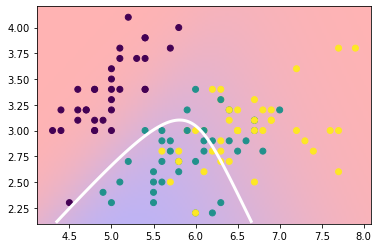

In [42]:
plt.scatter(small_train['длина чашелистика (см)'], small_train['ширина чашелистика (см)'], c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1., 2.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=3., colors='white')

plt.show()

#### Кластеризация

In [43]:
from sklearn.cluster import KMeans

In [45]:
flowers = iris1.to_numpy()
flowers

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

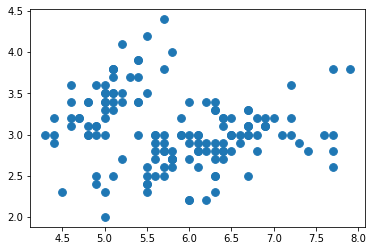

In [46]:
plt.scatter(flowers[:, 0], flowers[:, 1], cmap='autumn', s=60)

In [64]:
# указываем количество кластеров - 3
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(flowers)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

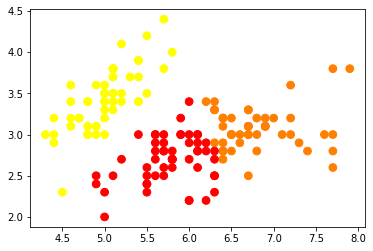

In [65]:
plt.scatter(flowers[:, 0], flowers[:, 1], cmap='autumn', c=clusters, s=60)

In [66]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(flowers)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

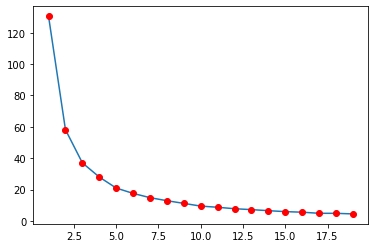

In [69]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

#### Иерархическая кластеризация

In [70]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

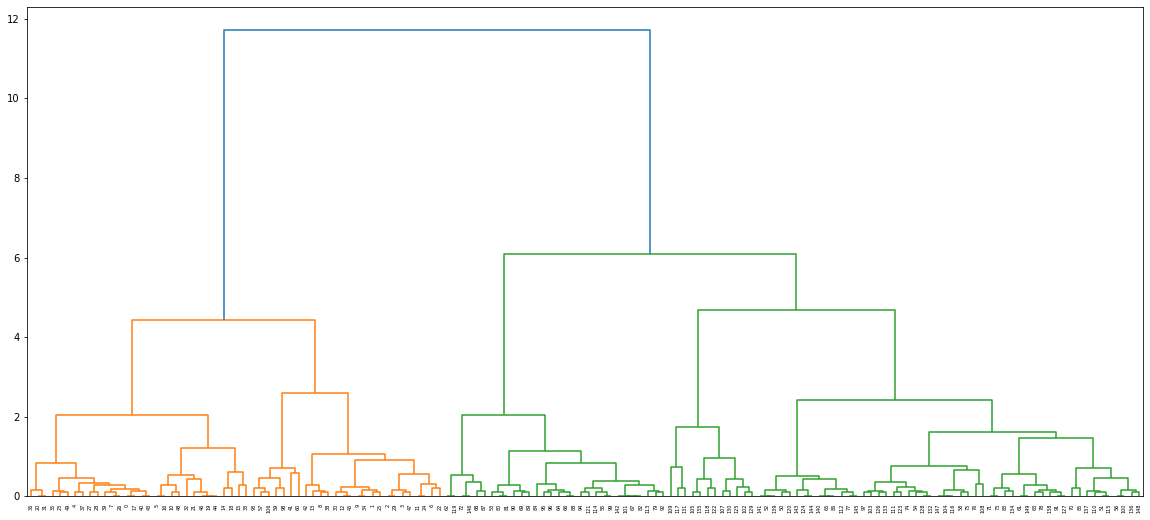

In [71]:
# строим дендрограмму
distance_mat = pdist(flowers) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [72]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [73]:
aglo = AgglomerativeClustering(n_clusters=3)
clusters = aglo.fit_predict(flowers)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0], dtype=int64)

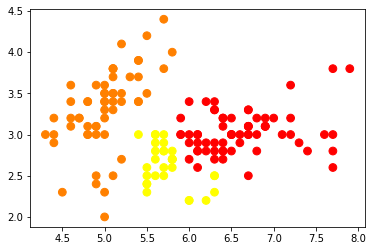

In [74]:
plt.scatter(flowers[:, 0], flowers[:, 1],cmap='autumn', c=clusters, s=60)